In [13]:
from sklearn.linear_model import LinearRegression

In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools

###sklearn.preprocessing
from statsmodels.tools.eval_measures import rmse

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
import pandas as pd

In [3]:
location = r"E:\Python\Machine Learning\datasets\Advertising.csv"
location

'E:\\Python\\Machine Learning\\datasets\\Advertising.csv'

In [4]:
#import numpy, pandas,
# load the training data from glass data set
df_training = pd.read_csv(location)
df_training.head()

,Month,TV,radio,newspaper,sales
0,Jan-00,230.1,37.8,69.2,22.1
1,Feb-00,44.5,39.3,45.1,10.4
2,Mar-00,17.2,45.9,69.3,9.3
3,Apr-00,151.5,41.3,58.5,18.5
4,May-00,180.8,10.8,58.4,12.9


In [5]:
type(df_training)

pandas.core.frame.DataFrame

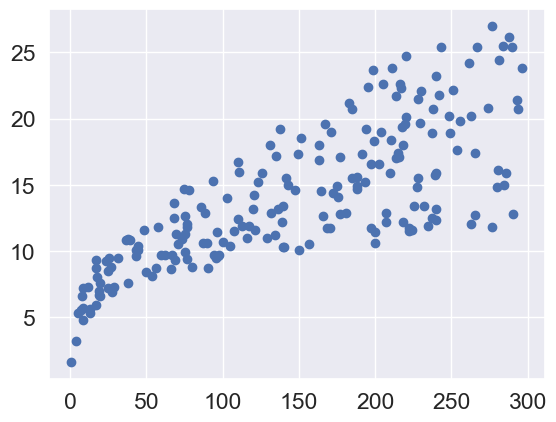

In [6]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(df_training['TV'], df_training['sales'])

In [7]:
df_training.dtypes

Month         object
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [8]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      200 non-null    object 
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df_training.tail()

,Month,TV,radio,newspaper,sales
195,16-Apr,38.2,3.7,13.8,7.6
196,16-May,94.2,4.9,8.1,9.7
197,16-Jun,177.0,9.3,6.4,12.8
198,16-Jul,283.6,42.0,66.2,25.5
199,16-Aug,232.1,8.6,8.7,13.4


In [11]:
df_training.columns

Index(['Month', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [12]:
df_training.describe(include='O')

,Month
count,200
unique,200
top,Jan-00
freq,1


In [13]:
df2= df_training.describe()
df2

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


50% of the total investment in less than df2.loc

average amount invested for advertising in the TV is 147. Data shows deviation of 85st

maximum amount invested in TV advertisement is 296.

Total 200 transactions is done for TV advertizement

In [14]:
# check the shape of the DataFrame (rows, columns)
df_training.shape

(200, 5)

In [15]:
# What are the features?

# TV: advertising dollars spent on TV for a single product in a given market 
#    (in thousands of dollars)
# Radio: advertising dollars spent on Radio
# Newspaper: advertising dollars spent on Newspaper

# What is the response?

# Sales: sales of a single product in a given market (in thousands of items)

# What else do we know?

# Because the response variable is continuous, this is a regression problem.
# There are 200 observations (represented by the rows), and each observation is a single market.

In [16]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


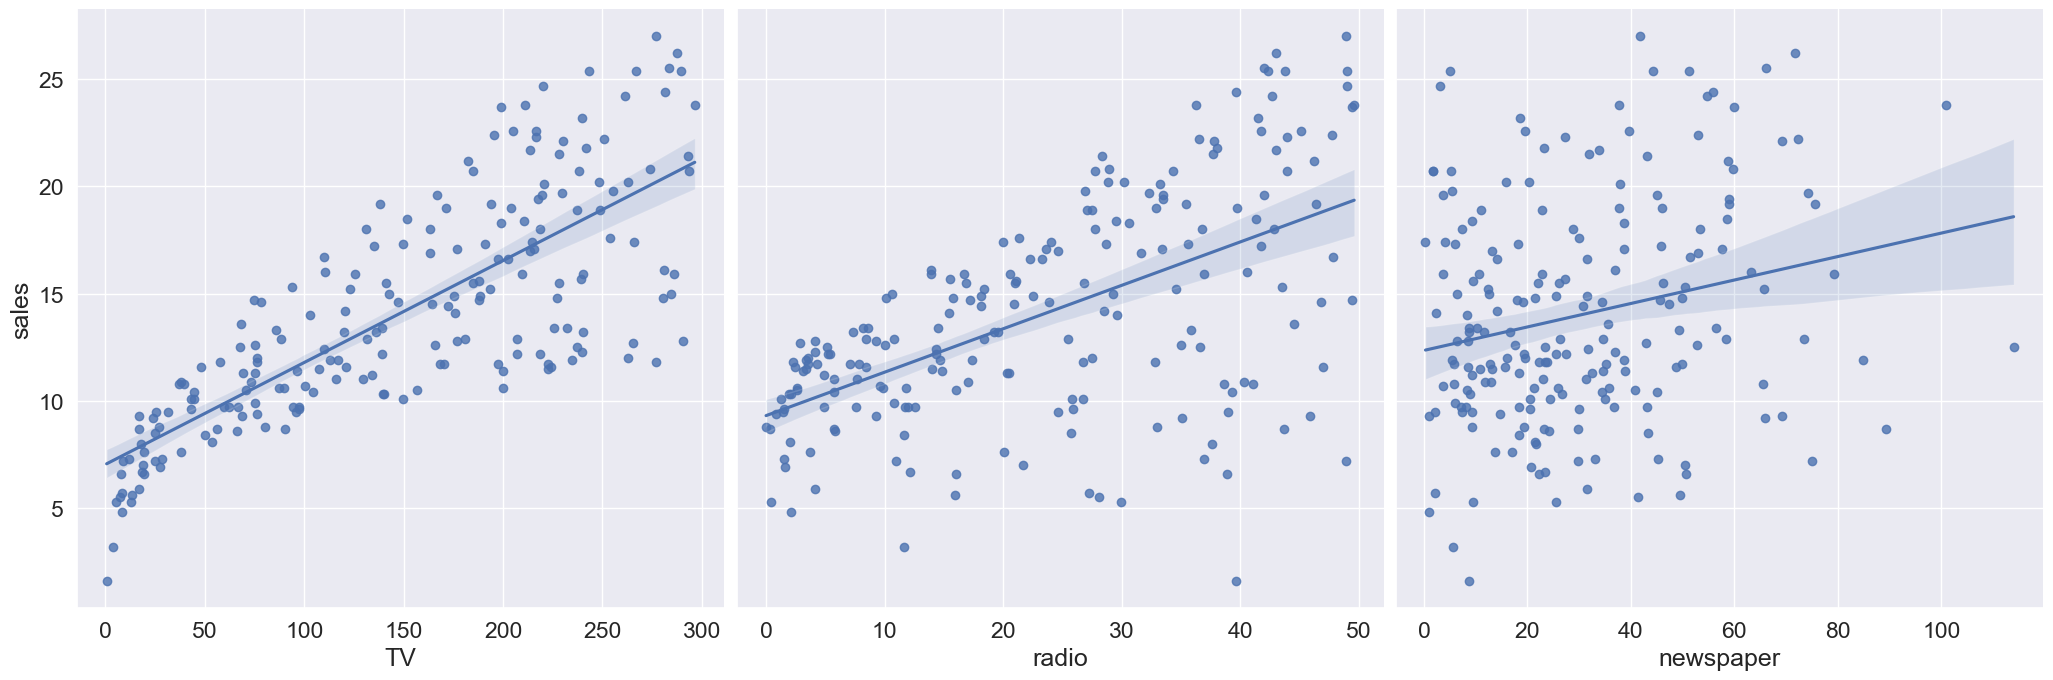

In [17]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_training,
             x_vars=['TV','radio','newspaper'], 
             y_vars='sales', 
             height=7, 
             aspect=1,
            kind ='reg')
#plt.show()

In [18]:
# Linear regression
# Pros: fast, no tuning required, highly interpretable, well-understood

# Cons: unlikely to produce the best predictive accuracy (presumes a linear relationship 
#                                                         between the features and response)

In [9]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']
#print(type(feature_cols))
# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]


# select a Series from the DataFrame
y = df_training['sales']
type(y)

pandas.core.series.Series

In [10]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [11]:
# The diagonal of the above matirx shows the auto-correlation of the variables. 
# It is always 1. 

# observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and 
# then betweeb sales and radio i.e. 0.576.

# correlations can vary from -1 to +1. 
# Closer to +1 means strong positive correlation and close -1 means strong negative correlation. 
# Closer to 0 means not very strongly correlated. 

##  -0.2 to 0.3 no corr
##  -0.3 to -0.6  moderate
##  -1  to -0.7  highly
##  +0.3 to +0.6  moderate
##  +1  to +0.7  highly

# variables with strong correlations are mostly probably candidates for model builing.**
df_training[['TV', 'radio', 'newspaper', 'sales']].corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [22]:
###cor_df = df_training.corr()

In [23]:
cor_df

NameError: name 'cor_df' is not defined

In [ ]:
cor_df[cor_df >0.5]

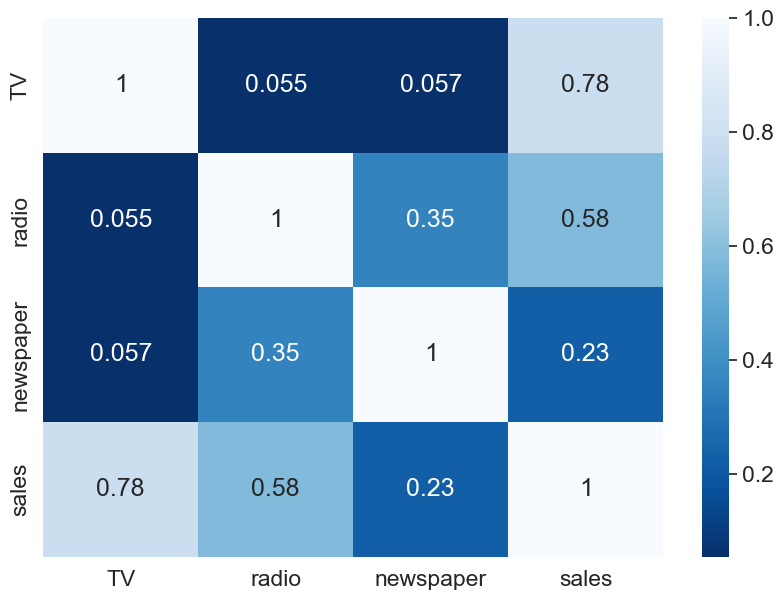

In [18]:
#sns.heatmap(  df_training.corr(), annot = False ,cbar = False, cmap='Blues_r' )
plt.figure(figsize=(10,7))
sns.heatmap(  df_training[['TV', 'radio', 'newspaper', 'sales']].corr(), annot = True , cmap='Blues_r' )
plt.show()

<Axes: >

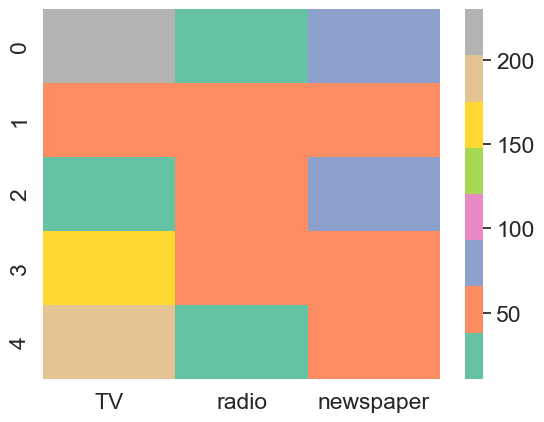

In [19]:
sns.heatmap(df_training[feature_cols].head(),annot=False, cmap="Set2" )

In [ ]:
from sklearn.model_selection import train_test_split

In [37]:
df_training.shape

(200, 5)

In [24]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10,  test_size=0.2)

In [25]:
X_train.shape

(160, 3)

In [26]:
type(y_train)

pandas.core.series.Series

In [41]:
X_test.shape

(40, 3)

In [42]:
##a, B,C,D = train_test_split(X, y, random_state=1,  test_size=0.3)

In [43]:
type(X_train.size)

numpy.int32

In [27]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [28]:
import sklearn

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
from sklearn.linear_model import LinearRegression
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# fit the model to the training data (learn the coefficients)
#linreg_sm = smdl.OLS(y_train, X_train).fit()

LinearRegression()

In [31]:
linreg.coef_

array([ 0.0437726 ,  0.19343299, -0.00222879])

In [32]:
linreg.intercept_

3.2540971144188813

In [33]:
linreg.predict([[140, 40, 30], [160,45,80]])

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.0527172 , 18.78389456])

In [34]:
linreg.predict([[140, 40, 30], [130,89,56 ]])

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.0527172 , 26.03525888])

In [35]:
## y = B0+b1x1+b2x2+b3x3
3.254+  (0.04377*140) + (0.1934329*40)+  (-0.00222879*30)

17.0522523

In [36]:
linreg.predict([[140, 40, 0]])

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.11958099])

In [37]:
y=mx+c
m = slop
c= const, intercept = 

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1542806320.py, line 3)

#y= b0 + b1x1 + b2x2 + b3x3
#y = linreg.intercept_ + linreg.coef_[0]* df["col_name"] + linreg.coef_[1]*df['col2_name'] + linreg[2]*df["col3_name"]

## Matrix
## Metrics: errors

In [38]:
# Making predictions
# make predictions on the testing set
y_pred = linreg.predict(X_test)
# predict using sm
#y_pred_sm = linreg.predict(X_test)

In [35]:
type(y_pred)

numpy.ndarray

In [36]:
type(y_test)

pandas.core.series.Series

In [55]:
erro = y_test - y_pred
erro

59     0.237470
5     -5.726632
20    -0.053110
198    1.855353
52     1.895616
19     0.317720
162   -0.044935
55     2.317670
69     1.124918
2     -3.431105
98     1.396879
10     1.384559
75    -3.547622
142    0.856540
124    0.317581
63     0.543562
109    0.175291
78    -3.953165
111    0.667319
185    1.692376
154    0.065146
130   -9.325294
61     1.370448
87     0.187756
102   -2.625157
121   -1.162187
136   -2.397834
1     -2.303376
47     1.458619
172   -0.362154
159    0.399000
39     1.044647
76     2.178800
91     2.577407
35    -3.952923
178   -3.958050
127    2.055845
169   -2.734774
46     1.584082
174   -2.117599
Name: sales, dtype: float64

In [ ]:
linreg.coef_

In [ ]:
feature_cols

In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

In [ ]:
linreg.intercept_

In [ ]:
sum((y_test-y_pred))/60

In [ ]:
sum(abs(y_test - y_pred))/60

In [ ]:
# coefficients from sm
# linreg_sm.params

In [ ]:
# y = 2.93 + 0.0466 * TV + 0.176 * Radio + 0.0018 * Newspaper

# 0.0466 * TV - per unit increase in TV spend will lead to 4.66% increase in sales
# 0.179 * Radio -                                          17.9% 
# 0.00345 * Newspaper - ...............                    0.3 % ....

In [ ]:
# summary report from sm
# linreg_sm.summary()

In [ ]:
#x => y - y_pred
#positive
#negative

In [39]:
# Model evaluation metrics for regression
from sklearn import metrics
print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

y-intercept             :  3.2540971144188813
beta coefficients       :  [ 0.0437726   0.19343299 -0.00222879]
Mean Abs Error   MAE    :  1.885013031042315
Mean Sq  Error MSE      :  6.700486756528875
Root Mean Sq Error RMSE :  2.58852984462781
r2 value                :  0.8353672324670594


In [29]:
from sklearn import metrics

In [30]:
metrics.mean_absolute_error(y_test, y_pred)

1.885013031042315

In [31]:
metrics.mean_squared_error(y_test,y_pred)

6.700486756528875

In [ ]:
# R-squared is a statistical measure of how close the data are to the fitted regression line.
# R-square signifies percentage of variations in the reponse variable that can be explained 
# by the model.
# R-squared = Explained variation / Total variation

# Total variation is variation of response variable around it's mean.
# R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the 
# variability, while 100% signifies that the model explains all the variability of the response. 
# The closer the r-square to 100%, the better is the model.

In [ ]:
# How do we interpret the TV coefficient (0.0466)?

# For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending 
# is associated with a 0.0466 "unit" increase in Sales.

# Important notes:

# This is a statement of association, not causation.

# If an increase in TV ad spending was associated with a decrease in sales, 
# beta_1 would be negative.

In [ ]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [ ]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

# calculate MAE by hand
print((10 + 0 + 20 + 10)/4)

# calculate MAE using scikit-learn
print(metrics.mean_absolute_error(true, pred))
print(metrics.mean_absolute_error(y_test, y_pred))

In [ ]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
# Computing the RMSE for our Sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
# Feature selection
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

In [ ]:
# what does the coeff for newspaper say?

# For a given amount of Radio and TV adv spending, a "unit" increase in newspaper adv spending 
# is associated with a 0.0018 "unit" increase in Sales.

# can we remove the feature called 'newspaper'?

In [ ]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]

# select a Series from the DataFrame
y = df_training.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print(metrics.r2_score(y_test, y_pred))

In [ ]:
# The RMSE decreased when we removed Newspaper from the model. 
# (Error is something we want to minimize, so a lower number for RMSE is better.) 
# Thus, it is unlikely that this feature is useful for predicting Sales, 
# and should be removed from the model.

In [ ]:
# calculate r2 score

y_true_ex = [3, -0.5, 2, 7]
y_pred_ex = [2.5, 0.0, 2, 8]
print(metrics.r2_score(y_true_ex, y_pred_ex))

In [ ]:
# calculate r2-score for our sales example
print(metrics.r2_score(y_test, y_pred))

In [ ]:
abc=(1,2,3)
type(abc)

In [ ]:
list(abc)

In [ ]:
list1=[11,22,13]

In [ ]:
list1

In [ ]:
a=("a","b","c")

In [ ]:
list(a)

In [ ]:
list